### 加载数据

In [1]:
import torch
import torchvision

In [2]:
transformation = torchvision.transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(root='data/mnist', train=True, download=True, transform=transformation)
test_dataset = torchvision.datasets.MNIST(root='data/mnist', train=False, download=True, transform=transformation)

In [3]:
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([64, 1, 28, 28]) torch.Size([64])


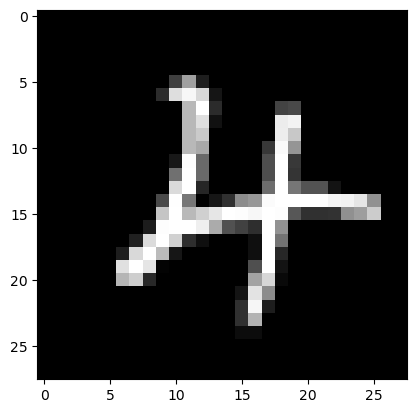

torch.Size([64, 1, 28, 28]) torch.Size([64])


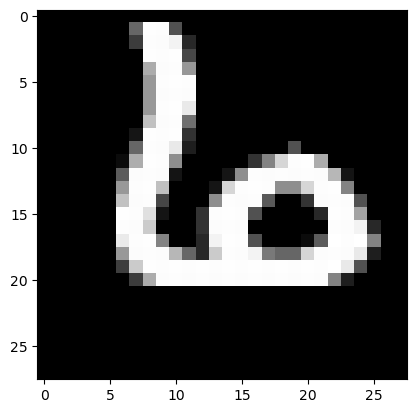

torch.Size([64, 1, 28, 28]) torch.Size([64])


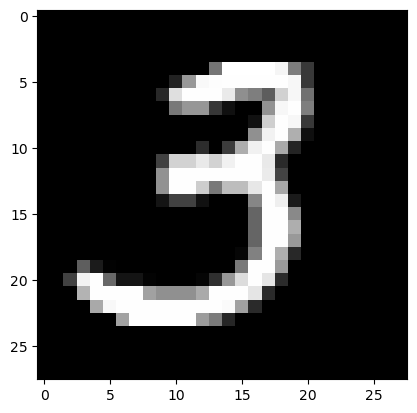

torch.Size([64, 1, 28, 28]) torch.Size([64])


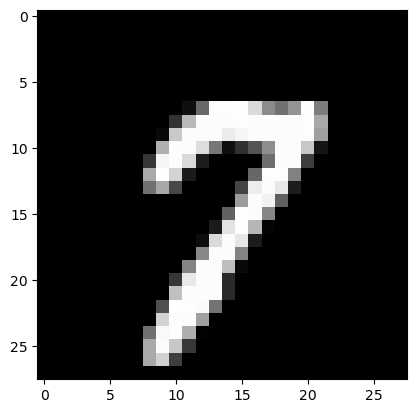

torch.Size([64, 1, 28, 28]) torch.Size([64])


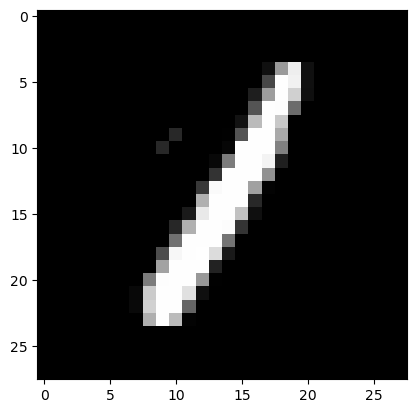

torch.Size([64, 1, 28, 28]) torch.Size([64])


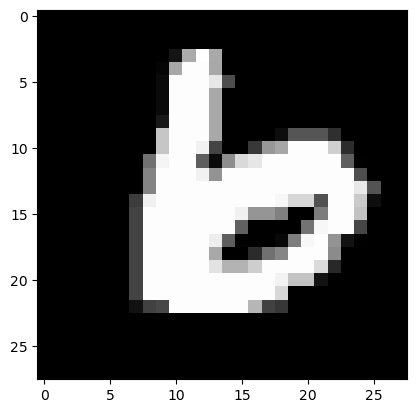

torch.Size([64, 1, 28, 28]) torch.Size([64])


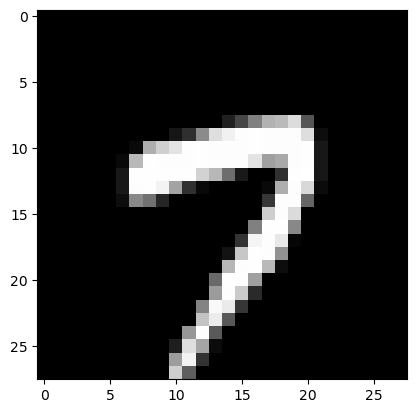

torch.Size([64, 1, 28, 28]) torch.Size([64])


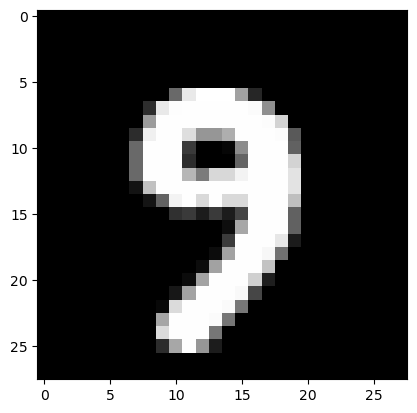

torch.Size([64, 1, 28, 28]) torch.Size([64])


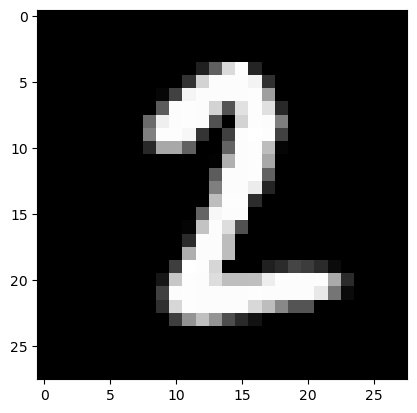

torch.Size([64, 1, 28, 28]) torch.Size([64])


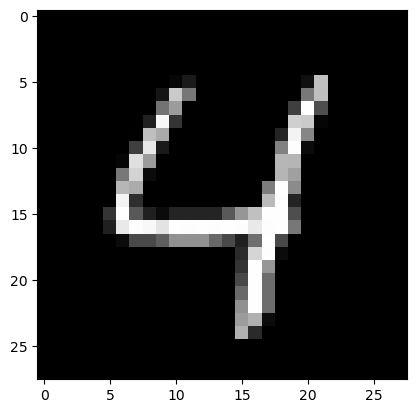

torch.Size([64, 1, 28, 28]) torch.Size([64])


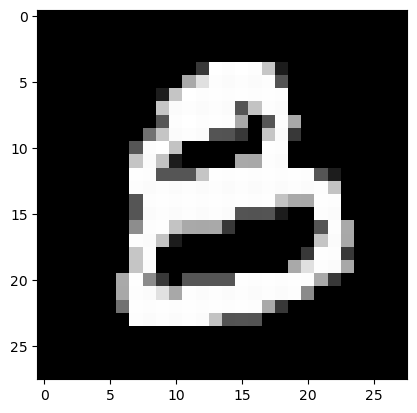

torch.Size([64, 1, 28, 28]) torch.Size([64])


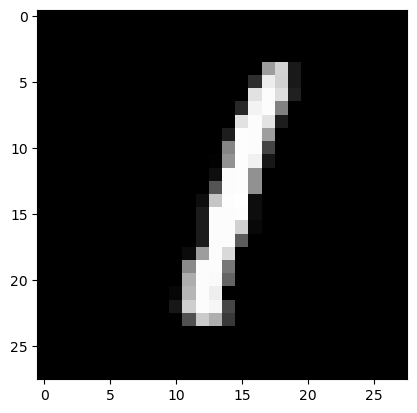

In [10]:
import matplotlib.pyplot as plt

for i, (images, labels) in enumerate(train_dataloader):
    print(images.shape, labels.shape)
    
    plt.imshow(images[0][0], cmap='gray')
    plt.show()
    
    if i > 10:
        break

### 构建网络

In [11]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        logits = self.linear(x)
        return logits

In [12]:
input_size = 28*28
output_size = 10
model = Model(input_size, output_size)

### 损失函数和优化器

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### 模型评估

In [27]:
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for x, y in data_loader:
            x = x.view(-1, input_size)
            logits = model(x)
            _, predicted = torch.max(logits.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
            
    return correct / total

### 模型训练

In [29]:
for epoch in range(10):
    for images, labels in train_dataloader:
        images = images.view(-1, 28*28)
        labels = labels.long()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    accuracy = evaluate(model, test_dataloader)
    print(f'Epoch {epoch+1}: test accuracy = {accuracy:.2f}')

Epoch 1: test accuracy = 0.92
Epoch 2: test accuracy = 0.92
Epoch 3: test accuracy = 0.92
Epoch 4: test accuracy = 0.92
Epoch 5: test accuracy = 0.92
Epoch 6: test accuracy = 0.92
Epoch 7: test accuracy = 0.92
Epoch 8: test accuracy = 0.92
Epoch 9: test accuracy = 0.92
Epoch 10: test accuracy = 0.92
